## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.
    
For this project, I will be working to understand the results of an A/B test run by an e-commerce website. My goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

Importing libraries

In [4]:
#importing libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [5]:
df= pd.read_csv('ab_data.csv')
#display top rows
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [6]:
total=len(df)

c. The number of unique users in the dataset.

In [7]:
len(df['user_id'].unique())

290584

#### d. The proportion of users converted.

In [8]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [9]:
df2=df.query("(group == 'control' and landing_page == 'new_page') or (group == 'treatment' and landing_page == 'old_page')")
len(df2)

3893

In [10]:
df2.describe()

,user_id,converted
count,3893.000000,3893.000000
mean,785682.547906,0.124326
std,90159.968183,0.329995
min,630052.000000,0.000000
25%,708538.000000,0.000000
50%,783362.000000,0.000000
75%,864749.000000,0.000000
max,945971.000000,1.000000


In [11]:
df2

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
776,820951,2017-01-04 02:42:54.770627,treatment,old_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1


f. Do any of the rows have missing values?

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [13]:
#Dropping the rows where treatment matches old_page and control matches new_page

indices=df.query("(group == 'control' and landing_page == 'new_page') or (group == 'treatment' and landing_page == 'old_page')").index.values
indices
df2=df.drop(indices)

In [14]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [15]:
# Double Check all of the correct rows were removed 
df2[((df2['group'] == 'control') == (df2['landing_page'] == 'old_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [16]:
#nunique returns number of unique entries
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [17]:
df2['user_id'].duplicated()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
          ...  
294448    False
294449    False
294450    False
294451    False
294452    False
294453    False
294454    False
294455    False
294456    False
294457    False
294458    False
294459    False
294460    False
294461    False
294462    False
294463    False
294464    False
294465    False
294466    False
294467    False
294468    False
294469    False
294470    False
294471    False
294472    False
294473    False
294474    False
294475    False
294476    False
294477    False
Name: user_id, Length: 2

- **By the difference in total length (290585 and previously 290584 against out[12], we can say verify that there's one duplicated user_id**
- **Finding the duplicated id:**

In [18]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [19]:
df2[df2.duplicated(subset='user_id', keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [20]:
#Renoving the the row with index '2893'

df2.drop(2893, inplace=True)

In [21]:
#Check if duplicates are removed
sum(df2.duplicated())

0

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [22]:
df.converted.mean()

0.11965919355605512

b. Given that an individual was in the `control` group, what is the probability they converted?

In [23]:
(df.query('group == "control"')['converted']).mean()

0.12039917935897611

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [24]:
(df.query('group == "treatment"')['converted']).mean()

0.11891957956489856

d. What is the probability that an individual received the new page?

In [25]:
(df['landing_page'] == 'new_page').mean()

0.5

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**No, we do not have suficient evidence to conclude that the new treatment page leads to more conversions as here we see mean to be 0.5 which implies its equally likely for the old page to perform better too.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

#### Null Hypothesis:  Old page is better than the new page or is the same. (p_old >= p_new)
#### Alternate Hypothesis: New page is better than the old page. (p_old < p_new)

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [26]:
p_new=df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [27]:
p_old=df2.converted.mean()
p_old

0.11959708724499628

In [65]:
p_new-p_old

0.0

c. What is $n_{new}$, the number of individuals in the treatment group?

In [28]:
n_new=df2.query('group=="treatment"').count()[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [29]:
n_old=df2.query('group=="control"').count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [30]:
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])

In [31]:
new_page_converted

array([0, 1, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [32]:
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])

In [33]:
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [34]:
diff=new_page_converted.mean()-old_page_converted.mean()
diff

-0.00036010405713214622

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [35]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])
    diff = new_page_converted.mean() - old_page_converted.mean() 
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([    5.,    54.,   331.,  1375.,  2700.,  2996.,  1807.,   617.,
           98.,    17.]),
 array([-0.00495769, -0.00399757, -0.00303745, -0.00207733, -0.00111721,
        -0.00015709,  0.00080303,  0.00176315,  0.00272327,  0.00368339,
         0.00464351]),
 <a list of 10 Patch objects>)

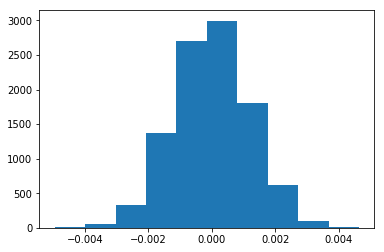

In [36]:
plt.hist(p_diffs)

(array([   26.,   193.,   787.,  2068.,  2828.,  2456.,  1193.,   375.,
           66.,     8.]),
 array([-0.0042717 , -0.00335956, -0.00244741, -0.00153527, -0.00062313,
         0.00028902,  0.00120116,  0.0021133 ,  0.00302545,  0.00393759,
         0.00484973]),
 <a list of 10 Patch objects>)

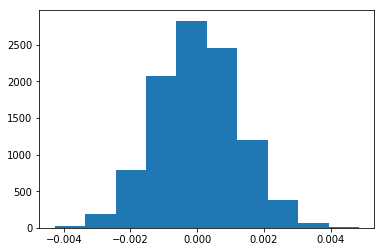

In [42]:
p_diffs=np.array(p_diffs)
null_vals= np.random.normal(0, p_diffs.std(),p_diffs.size)
plt.hist(null_vals)

In [43]:
p_mean=np.array(p_diffs).mean()

In [44]:
org_diff = df2.converted[df2.group == 'treatment'].mean() - df2.converted[df2.group == 'control'].mean()

In [45]:
org_diff 

-0.0015782389853555567

(array([    5.,    54.,   331.,  1375.,  2700.,  2996.,  1807.,   617.,
           98.,    17.]),
 array([-0.00495769, -0.00399757, -0.00303745, -0.00207733, -0.00111721,
        -0.00015709,  0.00080303,  0.00176315,  0.00272327,  0.00368339,
         0.00464351]),
 <a list of 10 Patch objects>)

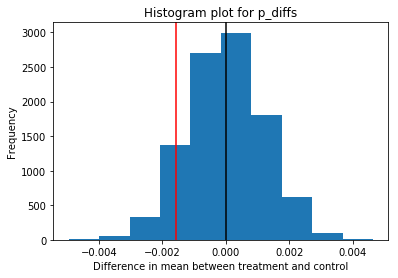

In [46]:
plt.axvline(x=org_diff, color='red')
plt.axvline(x=p_mean, color='black')
plt.ylabel('Frequency')
plt.xlabel('Difference in mean between treatment and control')
plt.title('Histogram plot for p_diffs')
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [52]:
(p_diffs > org_diff).mean()

0.90959999999999996

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**This value is called as the p-value. p-value is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true. By looking at our computed p-value which is significantly larger than expected, we can say that we fail to reject the null hpothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [53]:
import statsmodels.api as sm

convert_old = df2.query('landing_page=="old_page" and converted==1').count()[0]
convert_new = df2.query('landing_page=="new_page" and converted==1').count()[0]
n_old = df2.query('landing_page=="old_page"').count()[0]
n_new = df2.query('landing_page=="new_page"').count()[0]
print(convert_old)
print(n_old)
print(convert_new)
print(n_new)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


17489
145274
17264
145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [54]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new,n_old], alternative='larger')
print(p_value)
print(z_score)

0.905058312759
-1.31092419842


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**We can see that this gives us a relatively large p-value and a small z-score (1.3 standard deviations away from the mean). From both of these observations, we can say that we fail to reject the null hypothesis**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [55]:
df2['intercept']=1
df2[['control', 'ab_page']]=pd.get_dummies(df2['group'])
df2.drop(labels=['control'], axis=1, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [56]:

import statsmodels.api as sm

mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [57]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 08 Mar 2019   Pseudo R-squ.:               8.077e-06
Time:                        14:17:47   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value associated with ab_page is 0.190.**
**Since it is logistic regression, we take into account only two possibilities:**
**Null Hypothesis: p<sub>old</sub>= p<sub>new</sub> , Alternative Hypothesis:  p<sub>old</sub> != p<sub>new</sub>**
        
**In Part2 our hypothesis was as follows:**
**Null Hypothesis: p<sub>old</sub> >= p<sub>new</sub> , Alternative Hypothesis: p<sub>old</sub> < p<sub>new</sub>**

**The p-value in both the cases seem to be different due to the directional component in the previous hypothesis (as stated above in Part2)**
**We do not have enough statistical evidence in the difference between the conversion rates of both the new and old pages.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Including other factors helps us substantiate our response variable better. There might be multiple factors impacting the conversion rates.**

**However, inclduing multiple factors might have their own disadvantages such as multicollinearity. We should make sure that the explanatory variables do not have strong correlation among them, or else this might lead us to making false conclusions on our hypothesis.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [58]:

countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner') #Merging 2 data frames with index as user_id
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [59]:

### Create the necessary dummy variables
df_new[['CA','UK','US']]=pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [60]:
mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'US']])
results = mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 08 Mar 2019   Pseudo R-squ.:               1.521e-05
Time:                        14:18:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
==============================================================================
"""

In [61]:
### Fit Your Linear Model And Obtain the Results
mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'US', 'ab_page']])
results = mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 08 Mar 2019   Pseudo R-squ.:               2.323e-05
Time:                        14:18:15   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0099      0.013     -0.743      0.457      -0.036       0.016
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

**Here we do see that adding countries into the model did not help us predict any better as it did not have any significant effects to the conversion rates. From the respective p-values we can say that it is not statistically significant. Also, if we see the R-squared value (0.00002323) which is close to zero, that indicates this model does not fit well.**

<a id='conclusions'></a>
## Finishing Up


> In this project we have taken into account data with respect to a e-commerce website to help the company predict if implementing a new page in the website will increase the number of user clicks. A keypoint here is to make sure that a user clicking the new page option may not necessarily mean that he/she is viewing it. <br>
> We have taken into account two groups: Control and Treatment whose users land on the old and new page respectively. <br>
> We have analysed the data and interpreted the results through three different approaches: <br>
#### Probability
> Here we have calculated the proportion of users landing on the new page and the old page. Our results showed that the probability of users landing on either pages were equally likey (0.5).<br>
> Therefore, this was not sufficient for us to predict if implementing the new page on the website would have been beneficial for the company. <br>
#### Hypothesis Testing
> We started our Hypothesis Testing by defining the Null and Alternative Hypotheses. <br>
> Null Hypothesis: p<sub>old</sub> >= p<sub>new</sub> <br>
> Alternative Hypothesis: p<sub>old</sub> < p<sub>new</sub>
> After constituting various analysis, we did see that there was not much statistical evidence in difference between the conversion rates for both the new and old page. <br>
> The old page infact showed a better conversion rate. And finally taking the p-value and histogram plot in account, we could conclude that we failed to reject the null hypothesis. <br>
#### Logistic Regression
> We had taken into account logistic regression as our possible outcomes were two: either the website works better or not on the implementation of the new page. <br>
> Here we have also included multiple other factors like 'countries' to check if other factors effect the conversion rates as well. However, this did not seem to make any significant difference on the conversion rates. <br>
> Also, looking at other interpretation results like the R-squared value which was close to zero, we could say that the regression model did not fit well. <br>

Thus, taking into account all the above approaches, we can conclude that implementation of the new page will not be significantly beneficial for the company. Hence, the company should stick to the older page or run the experiment for a longer period of time.



### Resources

> https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
    
> https://www.statsmodels.org/stable/index.html
    
> http://jukebox.esc13.net/untdeveloper/RM/Stats_Module_4/mobile_pages/Stats_Module_48.html
    
> https://www.optimizely.com/optimization-glossary/ab-testing/
    
> https://github.com/SThornewillvE

In [2]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0